In [51]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [52]:
train_data = pd.read_csv('train4.csv') #讀取資料
y = train_data.pop('Survived').values #用pop方式 將訓練資料中的標籤值y取出來，作為訓練
col = train_data.columns
x = train_data[col].values #剩下的ROW作為訓練資料
train_x , valid_x , train_y , valid_y = train_test_split(x,y,test_size = 0.3 , random_state = 0 ) # 分訓練集 和驗證集
train = lgb.Dataset(train_x,train_y)
valid = lgb.Dataset(valid_x , valid_y , reference  = train)

In [26]:
gbm = lgb.LGBMClassifier(
boosting_typer = 'gbdt' ,
objective = 'binary',
metric = 'auc',
verbose = 0,
learning_rate = 0.01,
num_leaves = 35,
feature_fraction = 0.8,
bagging_fraction = 0.9,
bagging_freq = 8 ,
lambda_l1 = 0.6,
lambda_l2 = 0 )

In [ ]:
gbm.fit(train_x, train_y)
from sklearn.metrics import confusion_matrix, accuracy_score

In [85]:
from sklearn.metrics import mean_squared_error
# 将参数写成字典下形式
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'binary', # 目标函数
    'metric': {'auc'},  # 评估函数
    'num_leaves': 31,   # 叶子节点数
    'learning_rate': 0.05,  # 学习速率
    'feature_fraction': 0.9, # 建树的特征选择比例
    'bagging_fraction': 0.8, # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1 # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}
evals_result = {}  #记录训练结果所用
print('Start training...')
# 训练 cv and train
gbm = lgb.train(params,train,num_boost_round=20,valid_sets=valid,early_stopping_rounds=10,evals_result=evals_result)

print('Save model...')
# 保存模型到文件
gbm.save_model('model.txt')

print('Start predicting...')
# 预测数据集
y_pred = gbm.predict(valid_x, num_iteration=gbm.best_iteration)
# 评估模型
print(y_pred)
print('The rmse of prediction is:', mean_squared_error(valid_y, y_pred) ** 0.5)


Start training...
[1]	valid_0's auc: 0.667458
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.80747
[3]	valid_0's auc: 0.823248
[4]	valid_0's auc: 0.822322
[5]	valid_0's auc: 0.822901
[6]	valid_0's auc: 0.821946
[7]	valid_0's auc: 0.82623
[8]	valid_0's auc: 0.830023
[9]	valid_0's auc: 0.830718
[10]	valid_0's auc: 0.833961
[11]	valid_0's auc: 0.83454
[12]	valid_0's auc: 0.835611
[13]	valid_0's auc: 0.836364
[14]	valid_0's auc: 0.833121
[15]	valid_0's auc: 0.832252
[16]	valid_0's auc: 0.83231
[17]	valid_0's auc: 0.8326
[18]	valid_0's auc: 0.834279
[19]	valid_0's auc: 0.833468
[20]	valid_0's auc: 0.834453
Did not meet early stopping. Best iteration is:
[13]	valid_0's auc: 0.836364
Save model...
Start predicting...
[0.49245715 0.28378658 0.64894863 0.39138525 0.36343795 0.35304933
 0.23846079 0.39276387 0.41161142 0.39778546 0.37529547 0.64915213
 0.50704132 0.28306562 0.57361767 0.21921732 0.61389312 0.38968335
 0.33193369 0.65517263 0.36618203 0.6551726

     Pclass   Sex    Age  SibSp  Parch      Fare  Embarked
0      3.00 -0.98  22.00   0.59  -0.18    7.2500     -0.20
1      0.99  1.53  38.00   0.59  -0.18   71.2833      0.69
2      3.00  1.53  26.00  -0.17  -0.18    7.9250     -0.20
3      0.99  1.53  35.00   0.59  -0.18   53.1000     -0.20
4      3.00 -0.98  35.00  -0.17  -0.18    8.0500     -0.20
5      3.00 -0.98  30.00  -0.17  -0.18    8.4583      0.03
6      0.99 -0.98  -0.16  -0.17  -0.18   51.8625     -0.20
7      3.00 -0.98   2.00  -1.24   0.68   21.0750     -0.20
8      3.00  1.53  27.00  -0.17   0.33   11.1333     -0.20
9      0.37  1.53  14.00   0.59  -0.18   30.0708      0.69
10     3.00  1.53   4.00   0.59   0.68   16.7000     -0.20
11     0.99  1.53  58.00  -0.17  -0.18   26.5500     -0.20
12     3.00 -0.98  20.00  -0.17  -0.18    8.0500     -0.20
13     3.00 -0.98  39.00   0.59   5.00   31.2750     -0.20
14     3.00  1.53  14.00  -0.17  -0.18    7.8542     -0.20
15     0.37  1.53  55.00  -0.17  -0.18   16.0000     -0.

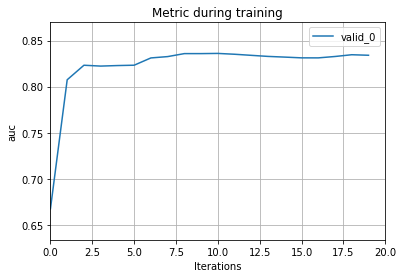

画特征重要性排序...


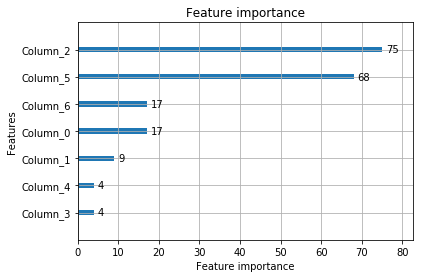

Plot 3th tree...


AttributeError: module 'lightgbm' has no attribute 'to_graphviz'

In [84]:
print(train_data)
import matplotlib.pyplot as plt
from graphviz import Digraph
print('画出训练结果...')
ax = lgb.plot_metric(evals_result, metric='auc')#metric的值与之前的params里面的值对应
plt.show()

print('画特征重要性排序...')
ax = lgb.plot_importance(gbm, max_num_features=10)#max_features表示最多展示出前10个重要性特征，可以自行设置
plt.show()

print('Plot 3th tree...')  # 画出决策树，其中的第三颗 
ax = lgb.plot_tree(gbm, tree_index=3, figsize=(20, 8), show_info=['split_gain'])
plt.show()

# print('导出决策树的pdf图像到本地')#这里需要安装graphviz应用程序和python安装包
# graph = lgb.create_tree_digraph(gbm, tree_index=3, name='Tree3')
# graph.render(view=True)


In [82]:
# 在環境變量中加入安裝的Graphviz路徑
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

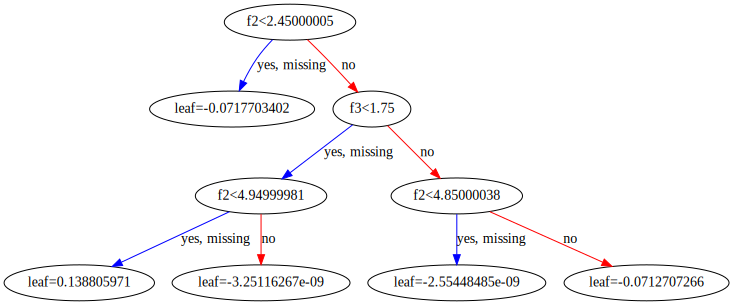

In [1]:

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

import xgboost as xgb
from sklearn.datasets import load_iris
iris = load_iris()

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(iris.data, iris.target)
xgb.to_graphviz(xgb_clf, num_trees=1)